## 1) Introduction

Air travel has become increasingly stressful, marked by confrontations among passengers. The lack of a clear social contract regarding in-flight etiquette contributes to disputes. To address this, a survey was conducted to understand passengers' perspectives on behaviors considered rude during flights. 

__Problem statement__:
Understanding passengers' perspectives on in-flight behaviors considered rude and recommend action plans

__Value for Stakeholder__:
The goal of this data is to provide insights for major airlines to enhance the flying experience, manage expectations, and potentially improve policies based on passenger preferences. The study delves into various aspects, including reclining seats, waking up neighbors, handling children on flights, and controlling armrests and window shades. The aim of this analysis is to offer valuable insights for stakeholders in the airline industry seeking to create a more harmonious and comfortable environment for their passengers.

## 2) Data Loading + Manipulation

__1. Load the data set into a Pandas dataframe__

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [ ]:
# Load data into dataframe
survey_data = pd.read_csv(r'https://raw.githubusercontent.com/Nivetha1509/Data-Science/master/Datasets/flying-etiquette.csv')
survey_data.head(1)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__2. Create a new dataframe comprised of only the demographic data for each individual that also includes the unique RespondentID__

In [4]:
# List of columns with demographic data
demographic_columns = ['How tall are you?',                       
                       'Gender',
                       'Age',
                       'Household Income',
                       'Education',
                       'Location (Census Region)']

# Create a new dataframe with the demographic data along with unique RespondentID
demographic_data = survey_data[['RespondentID']+demographic_columns]

# List of new column names 
new_column_names = ['Respondent_ID', 
                    'Height',
                    'Gender',
                    'Age',
                    'Household Income',
                    'Education',
                    'Location']

# Rename the columns
demographic_data.columns = new_column_names

demographic_data.head()

,Respondent_ID,Height,Gender,Age,Household Income,Education,Location
0,3436139758,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,"6'3""",Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,"5'8""",Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,"5'11""",Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,"5'7""",Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


__3. For the data values that were provided in response to the survey question “How tall are you?”, convert the provided feet/inches values to centimeters.__

In [5]:
#Check the unique values of height before transformation
demographic_data['Height']. unique()

array([nan, '6\'3"', '5\'8"', '5\'11"', '5\'7"', '5\'9"', '6\'2"',
       '6\'0"', '5\'6"', '6\'1"', '5\'10"', '5\'5"', '6\'4"',
       '6\'6" and above', 'Under 5 ft.', '6\'5"', '5\'4"', '5\'0"',
       '5\'3"', '5\'1"', '5\'2"'], dtype=object)

In [6]:
import re
def convert_feet_to_cm(height_str):
    '''Converts a height string in feet/inches format to centimeters.
    Args:
    height_str: A string representing a height in feet/inches format, e.g. "6'3"".
    Returns:
    The height in centimeters, as a float.
    '''   
    if pd.isna(height_str):
        return height_str
    elif height_str == 'Under 5 ft.':
        return 152.4
    elif height_str == '6\'6" and above':
        return 198.12
    
    feet, inches = map(int, height_str.replace('"', '').split("'"))
    height_cm = feet * 30.48 + inches * 2.54
    return round(height_cm,2)
    
demographic_data['Height'] = demographic_data['Height'].apply(convert_feet_to_cm)

demographic_data

,Respondent_ID,Height,Gender,Age,Household Income,Education,Location
0,3436139758,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,190.50,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,172.72,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,180.34,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,170.18,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
...,...,...,...,...,...,...,...
1035,3431732652,170.18,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central
1036,3431731770,NaN,Male,45-60,150000,Bachelor degree,Pacific
1037,3431731485,NaN,Female,> 60,NaN,Some college or Associate degree,East North Central
1038,3431731196,NaN,Female,30-44,"$50,000 - $99,999",Bachelor degree,New England


In [7]:
#Check the unique values of height after transformation
demographic_data['Height']. unique()

array([   nan, 190.5 , 172.72, 180.34, 170.18, 175.26, 187.96, 182.88,
       167.64, 185.42, 177.8 , 165.1 , 193.04, 198.12, 152.4 , 195.58,
       162.56, 160.02, 154.94, 157.48])

__4. Create a new dataframe comprised of only the non-demographic survey question responses along with the corresponding unique RespondentID__

In [8]:
# List of columns with demographic data
non_demographic_columns = [col for col in survey_data.columns if col not in demographic_columns]

# Create a new dataframe with the demographic data along with unique RespondentID
non_demographic_data = survey_data[non_demographic_columns]

# List of new column names 
new_column_names = ['Respondent_ID',   
                    'Travel_Frequency',  
                    'Recline_Preference',
                    'Children_Under18',            
                    'Armrest_Preference_RowOfThree',
                    'Armrest_Preference_RowOfTwo',
                    'Window_Shade_Control',
                    'Move_Unsold_Seat_Rudeness',
                    'Talking_Rudeness',
                    'Acceptable_GetUp_Frequency',
                    'Reclining_Obligation',
                    'Recline_Rudeness',
                    'Eliminate_Reclining_Opportunity',
                    'Switch_Seats_Rudeness_Friends',
                    'Switch_Seats_Rudeness_Family',
                    'Wake_Up_Rudeness_Bathroom',
                    'Wake_Up_Rudeness_WalkAround',
                    'Baby_Rudeness',
                    'Unruly_Children_Rudeness',
                    'Personal_Electronics_Violation',
                    'Smoking_Rule_Violation']

# Rename the columns
non_demographic_data.columns = new_column_names

non_demographic_data.head()

,Respondent_ID,Travel_Frequency,Recline_Preference,Children_Under18,Armrest_Preference_RowOfThree,Armrest_Preference_RowOfTwo,Window_Shade_Control,Move_Unsold_Seat_Rudeness,Talking_Rudeness,Acceptable_GetUp_Frequency,...,Recline_Rudeness,Eliminate_Reclining_Opportunity,Switch_Seats_Rudeness_Friends,Switch_Seats_Rudeness_Family,Wake_Up_Rudeness_Bathroom,Wake_Up_Rudeness_WalkAround,Baby_Rudeness,Unruly_Children_Rudeness,Personal_Electronics_Violation,Smoking_Rule_Violation
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Twice,...,"Yes, somewhat rude",No,"No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude",No,No
2,3434275578,Once a year or less,Usually,No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",Three times,...,"No, not rude at all",No,"No, not at all rude","No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No
3,3434268208,Once a year or less,Always,No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Three times,...,"No, not rude at all",No,"Yes, somewhat rude","No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No
4,3434250245,Once a month or less,About half the time,No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Twice,...,"No, not rude at all",No,"No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No


__5. Convert the content of the dataframe resulting from Step 4 (above)  to a “tidy” long format__

In [9]:
# Melting from wide to long format
ids = ["Respondent_ID"]
values = non_demographic_data.columns[1:]

non_demographic_data = pd.melt(frame=non_demographic_data, id_vars=ids, value_vars=values, var_name='Question', value_name='Response')

non_demographic_data.head(5)

,Respondent_ID,Question,Response
0,3436139758,Travel_Frequency,Once a year or less
1,3434278696,Travel_Frequency,Once a year or less
2,3434275578,Travel_Frequency,Once a year or less
3,3434268208,Travel_Frequency,Once a year or less
4,3434250245,Travel_Frequency,Once a month or less


__6. Add a new column to the demographic dataframe resulting from Step 2 (above) that indicates whether
an individual either NEVER flys or at least sometimes flys.__

In [10]:
# Create a dataframe 'Travel_Freq' with data for Travel Frequency from 'non_demographic_data'
Travel_Freq = non_demographic_data[non_demographic_data['Question']=='Travel_Frequency'][['Respondent_ID','Response']]

#Classify if the individual is a flyer (Sometime flies) or not (Never flies)
Travel_Freq['Response'] = Travel_Freq.apply(lambda x: 'N' if x['Response'] =='Never' else 'Y',axis=1)

# Rename Column name
Travel_Freq.rename(columns={'Response': 'Flyer'}, inplace=True)

#Merge the Flyer detail with demographic_data
demographic_data = pd.merge(demographic_data, Travel_Freq, on='Respondent_ID')

demographic_data.head()

,Respondent_ID,Height,Gender,Age,Household Income,Education,Location,Flyer
0,3436139758,NaN,NaN,NaN,NaN,NaN,NaN,Y
1,3434278696,190.50,Male,30-44,NaN,Graduate degree,Pacific,Y
2,3434275578,172.72,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,Y
3,3434268208,180.34,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,Y
4,3434250245,170.18,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,Y


## 3) Exploratory Data Analysis

__7. Perform exploratory data analysis (EDA) on the dataframe resulting from Step 6 (above).__

### Data Summary

In [11]:
demographic_data.columns

Index(['Respondent_ID', 'Height', 'Gender', 'Age', 'Household Income',
       'Education', 'Location', 'Flyer'],
      dtype='object')

__Data Types__:
- Respondent_ID - Categorical Regular
- Height - Numeric Continuous
- Gender - Categorical Regular
- Age - Categorical Ordinal
- Household Income - Categorical Ordinal
- Education - Categorical Ordinal
- Location - Categorical Regular
- Flyer - Categorical Regular

### Summary Statistics

In [12]:
#Dimension of the Data
print('Number of Rows:',demographic_data.shape[0],'\nNumber of Columns:',demographic_data.shape[1])

Number of Rows: 1040 
Number of Columns: 8


In [13]:
# Describe the numerical variables
numerical_columns = demographic_data[demographic_data.columns[1:]].select_dtypes(include=['int', 'float']).describe()

# Describe the categorical variables
categorical_columns = demographic_data.select_dtypes(include=['object']).describe()

print('Summary Statistics: Numerical Columns')
display (numerical_columns)
print('Summary Statistics: Categorical Columns')
display (categorical_columns)

Summary Statistics: Numerical Columns


,Height
count,858.000000
mean,171.375991
std,9.997834
min,152.400000
25%,162.560000
50%,170.180000
75%,177.800000
max,198.120000


Summary Statistics: Categorical Columns


,Gender,Age,Household Income,Education,Location,Flyer
count,1007,1007,826,1001,998,1040
unique,2,4,5,5,9,2
top,Female,45-60,"$50,000 - $99,999",Bachelor degree,Pacific,Y
freq,528,275,294,325,218,874


### Univariate Analysis

__Approach__
- Get Summary Statistics
- Plot Graphs
    - For Categorical columns Bar plot is used.
    - For Numerical columns Histogram and Boxplot is used.
- Use proper title, labels and tick params

In [14]:
def Univariate_EDA(df, col):    
    '''Performs Univariate Analysis
    Args:
    df: A Dataframe to perform Univariate analysis
    col: Column in the df to perform Univariate analysis
    Returns:
    None
    '''
    
    # get summary statistics
    print('Summary Statistics')
    display(df[col].describe())

    # display unique values of Gender
    print('Unique Values')
    display(df[col].unique())
    
    
    if df[col].dtype == 'object':

        # create a bar plot of the value counts   
        plt.figure(figsize=(4,4))
        plt.title(col)
        
        # get value counts for the variable
        frequency = df[col].value_counts()
        sns.barplot(x=frequency.index, y=frequency.values, palette="viridis")
        plt.title(col)
        plt.ylabel("Counts")
        plt.tick_params(axis='x', rotation=90)
    
    if df[col].dtype == 'float': 
        
        plt.figure(figsize=(8,4))
        plt.suptitle(col)
        
        plt.subplot(1,2,1)
        sns.histplot(data=df, x=col, kde=True, color='skyblue')
       
        plt.subplot(1,2,2)
        sns.boxplot(data= df, y= col, color='green')  
       
    # Display plot
    plt.tight_layout()
    plt.show()    
       
    return None     

#### Height

Summary Statistics


count    858.000000
mean     171.375991
std        9.997834
min      152.400000
25%      162.560000
50%      170.180000
75%      177.800000
max      198.120000
Name: Height, dtype: float64

Unique Values


array([   nan, 190.5 , 172.72, 180.34, 170.18, 175.26, 187.96, 182.88,
       167.64, 185.42, 177.8 , 165.1 , 193.04, 198.12, 152.4 , 195.58,
       162.56, 160.02, 154.94, 157.48])

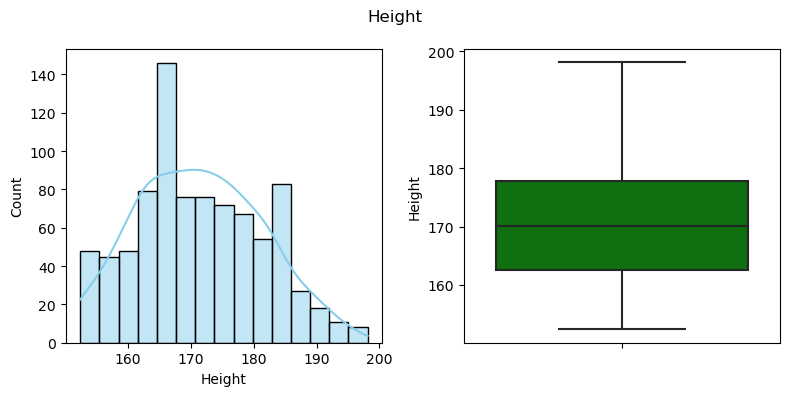

In [15]:
Univariate_EDA(demographic_data, 'Height')

__Insights:__

The summary statistics, histogram, and boxplot show that the mean value of __Height__ is very close to the median value.
The plot exhibits symmetric condition, indicating that the height of the people participated are normally distributed. 

#### Gender

Summary Statistics


count       1007
unique         2
top       Female
freq         528
Name: Gender, dtype: object

Unique Values


array([nan, 'Male', 'Female'], dtype=object)

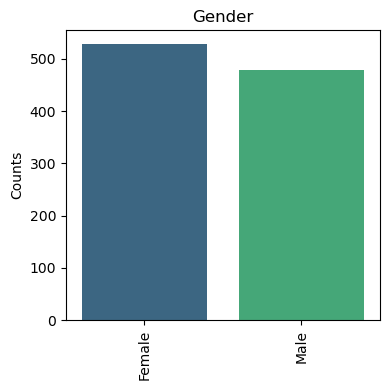

In [16]:
Univariate_EDA(demographic_data, 'Gender')

__Insights:__

The __Gender__ column is comprised of 2 distinct categorical values, with the most frequently occurring value being 'Female'.

#### Age

Summary Statistics


count      1007
unique        4
top       45-60
freq        275
Name: Age, dtype: object

Unique Values


array([nan, '30-44', '18-29', '45-60', '> 60'], dtype=object)

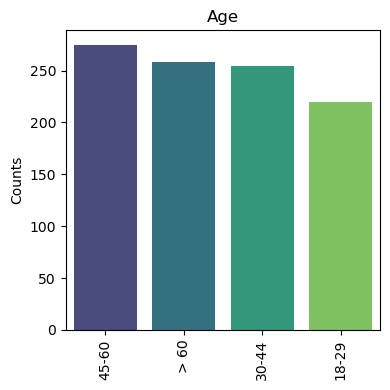

In [17]:
Univariate_EDA(demographic_data, 'Age')

__Insights:__

The graph shows that there are four unique values for __Age__ column. It is evident that a larger number of survey participants belongs to age group of 45 - 60.

#### Household Income

Summary Statistics


count                   826
unique                    5
top       $50,000 - $99,999
freq                    294
Name: Household Income, dtype: object

Unique Values


array([nan, '$100,000 - $149,999', '$0 - $24,999', '$50,000 - $99,999',
       '$25,000 - $49,999', '150000'], dtype=object)

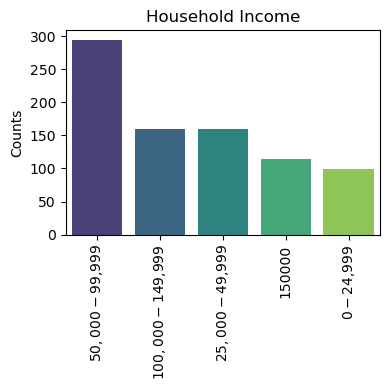

In [18]:
Univariate_EDA(demographic_data, 'Household Income')

__Insights:__

The graph shows that there are five unique values for __Household Income__ column. It is evident that a larger number of survey participants earns income in range of 50,000 - 99,999. This aligns with the median household income in the US.

Reference: https://www.census.gov/library/publications/2023/demo/p60-279.html#:~:text=Highlights,and%20Table%20A-1

#### Education

Summary Statistics


count                1001
unique                  5
top       Bachelor degree
freq                  325
Name: Education, dtype: object

Unique Values


array([nan, 'Graduate degree', 'Bachelor degree',
       'Some college or Associate degree', 'High school degree',
       'Less than high school degree'], dtype=object)

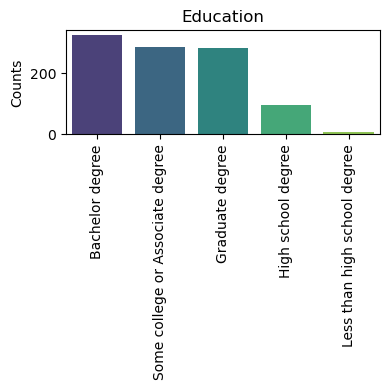

In [19]:
Univariate_EDA(demographic_data, 'Education')

__Insights:__

The graph shows that there are five unique values for __Education__ column. It is evident that a larger number of survey participants has Bachelor degree. Also, there are only very few respondents with education less than high school degree.

#### Location

Summary Statistics


count         998
unique          9
top       Pacific
freq          218
Name: Location, dtype: object

Unique Values


array([nan, 'Pacific', 'East North Central', 'New England', 'Mountain',
       'South Atlantic', 'East South Central', 'Middle Atlantic',
       'West North Central', 'West South Central'], dtype=object)

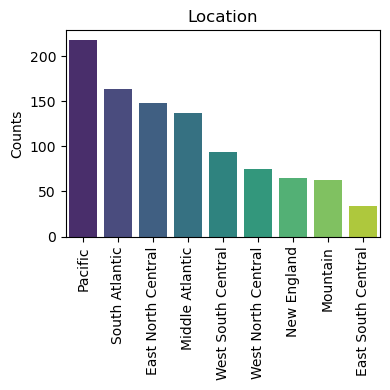

In [20]:
Univariate_EDA(demographic_data, 'Location')

__Insights:__

The graph shows that there are nine unique values for __Location__. It is evident that a larger number of survey participants are from the Pacific Region.

#### Flyer

Summary Statistics


count     1040
unique       2
top          Y
freq       874
Name: Flyer, dtype: object

Unique Values


array(['Y', 'N'], dtype=object)

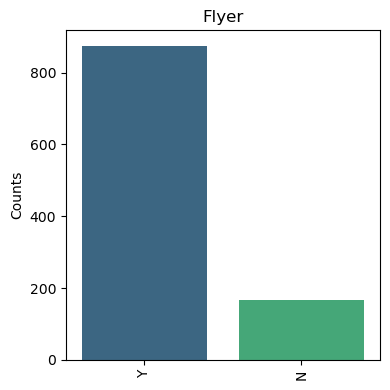

In [21]:
Univariate_EDA(demographic_data, 'Flyer')

__Insights:__

The __Flyer__ column is comprised of 2 distinct categorical values, with the most frequently occurring value being 'Y'.

### Bivariate Analysis

__Appraoch__ : 

The main motive is to understand the behavior of the data by creating valuable bivariate plots, discarding irrelevant relationships, such as Height vs Household Income.
These analyses aim to reveal valuable insights into the relationships between different variables and contribute to a deeper understanding of the data.

In [22]:
def Bivariate_EDA(df, col1, col2):
    
    '''Performs Bivariate Analysis
    Args:
    df: A Dataframe to perform Bivariate analysis
    col1: Column in the df to perform Bivariate analysis
    col2: Column in the df to perform Bivariate analysis
    Returns:
    None
    '''    
    if df[col1].dtype == 'object' and df[col2].dtype == 'object':
        # Create dataframe with value counts of col1 and col2
        bivariate = df[[col1,col2]].value_counts().reset_index(name='counts')
        
        # Sort ordinal columns if used as legends
        if col2 == 'Age' or col2 == 'Household Income':
            
            #Extract numerical data to sort
            bivariate['Sort'] = bivariate[col2].apply(lambda x: int(re.findall(r'\d+,*\d+',re.sub(',', '', x))[0]))  
                
            bivariate =bivariate.sort_values(by = ['Sort', 'counts'], ascending = [True,False]).drop('Sort', axis=1)        
            
        if  col2 == 'Education' : 
            
            #Custom Sorting
            custom_order = {'Less than high school degree': 0,
                            'High school degree': 1,
                            'Some college or Associate degree': 2,
                            'Bachelor degree': 3,
                            'Graduate degree': 4}

            bivariate['Sort'] = bivariate[col2].map(custom_order)
            
            bivariate = bivariate.sort_values(by = ['Sort', 'counts'], ascending = [True,False]).drop('Sort', axis=1)        
        
        #Bar plot for categorical vs categorical EDA
        plt.figure(figsize=(7,5))
        sns.barplot(x= col1, y='counts', data= bivariate, hue=col2, palette="tab10")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.ylabel("Counts")

    #Violin plot for numerical vs categorical EDA    
    elif df[col1].dtype == 'float' and df[col2].dtype == 'object': 
        plt.figure(figsize=(5,4))
        sns.violinplot(x=col2, y=col1, data=df) 
        
    elif df[col1].dtype == 'object' and df[col2].dtype == 'float': 
        plt.figure(figsize=(5,4))
        sns.violinplot(x=col1, y=col2, data=df)
    
    plt.title(col1 + ' vs ' + col2)
    plt.tick_params(axis='x', rotation=90)
    
    # Display plot
    plt.tight_layout()
    plt.show() 
    
    return None   

#### Height vs Gender

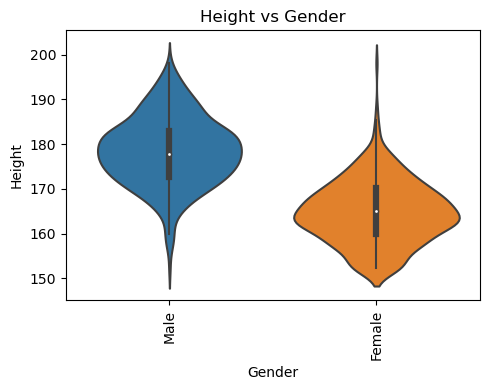

In [23]:
Bivariate_EDA(demographic_data, 'Height', 'Gender')

__Insights__:

The graph clearly illustrates that most of the male respondents (median height of male is 178) are taller than the female respondents (median height of female is 165).

#### Height vs Age

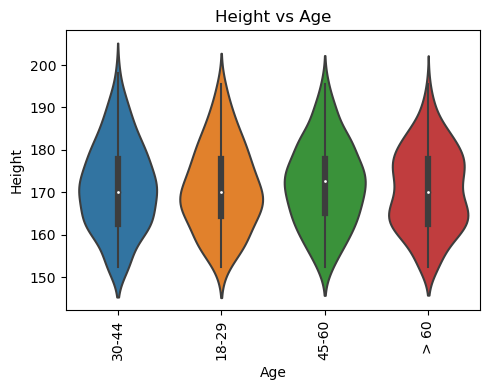

In [24]:
Bivariate_EDA(demographic_data, 'Height', 'Age')

__Insights__: 

The graph does not show any significant relationship between Age and Height. This also aligns with the common understanding that humans are unlikely to grow after the ages of 18-20.

#### Gender vs Age

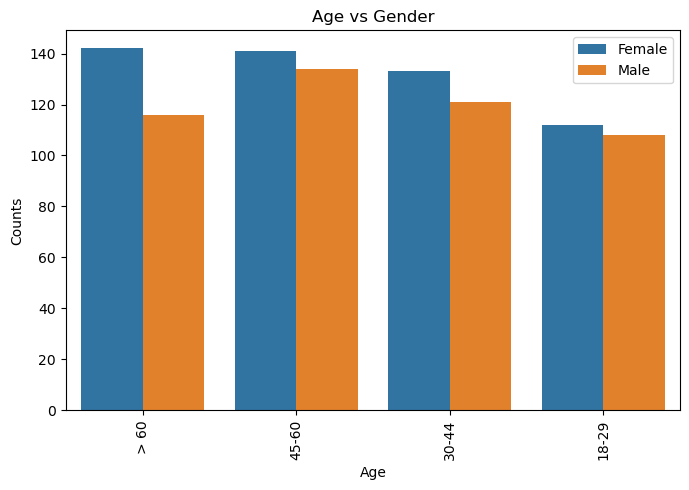

In [25]:
Bivariate_EDA(demographic_data, 'Age', 'Gender')

__Insights:__

The graph illustrates that there are more female respondents compared to male respondents across all age groups.

#### Gender vs Location

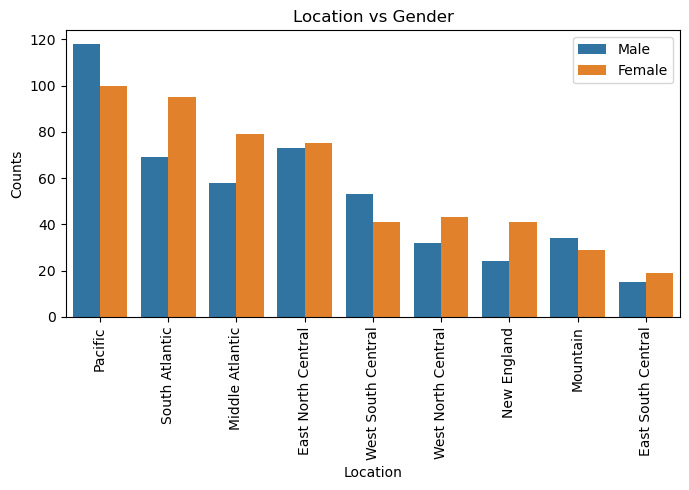

In [26]:
Bivariate_EDA(demographic_data, 'Location', 'Gender')

__Insights__:

The graph depicts that there are more female respondents across all locations, except Pacific, West South Central, Mountain region.

#### Gender vs Education

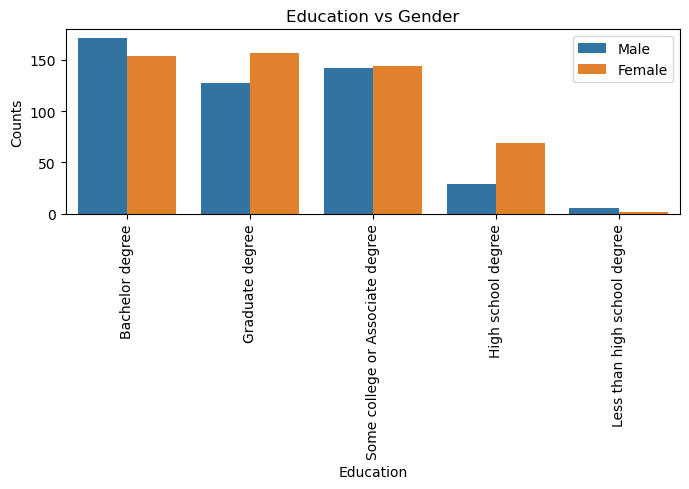

In [27]:
Bivariate_EDA(demographic_data, 'Education', 'Gender')

__Insights__:

The graph depicts that there are more female respondents across all education level, except Bachelor degree. Also the gap is notably small in 'Some college or Associate Degree'.

#### Gender vs Income

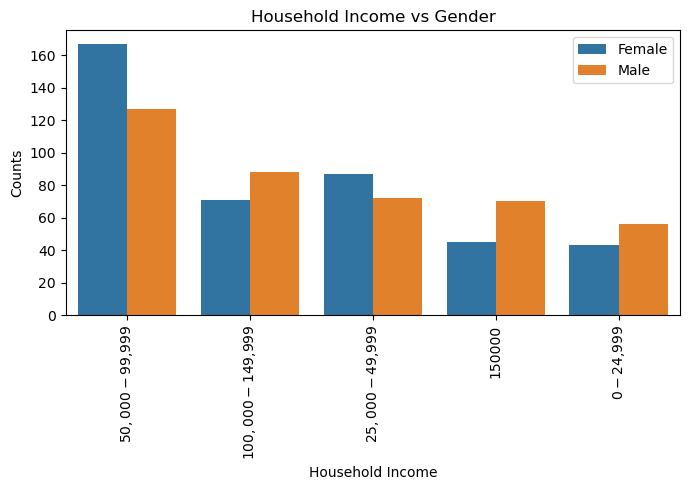

In [28]:
Bivariate_EDA(demographic_data, 'Household Income', 'Gender')

__Insights__:

The graph depicts that there are more male respondents than female respondents with low and high income range. whereas there are more female respondents than male respondents in the medium income range.

#### Age vs Location

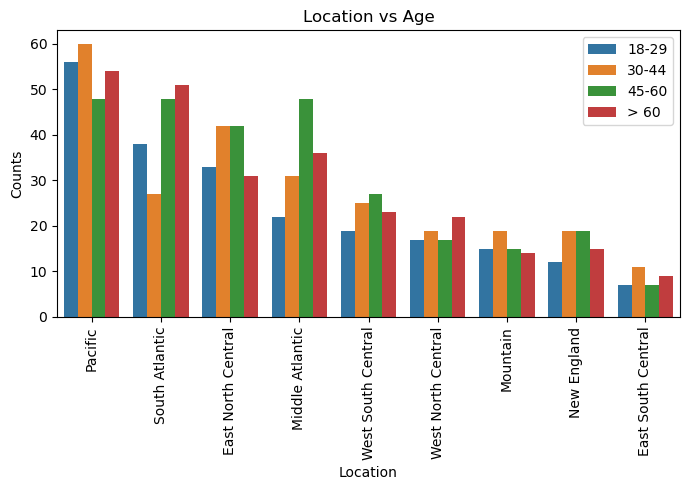

In [29]:
Bivariate_EDA(demographic_data, 'Location', 'Age')

__Insights__:

The graph depicts that the respondents are from multiple age groups across different locations, indicating that the survey consists of random population.

#### Age vs Education


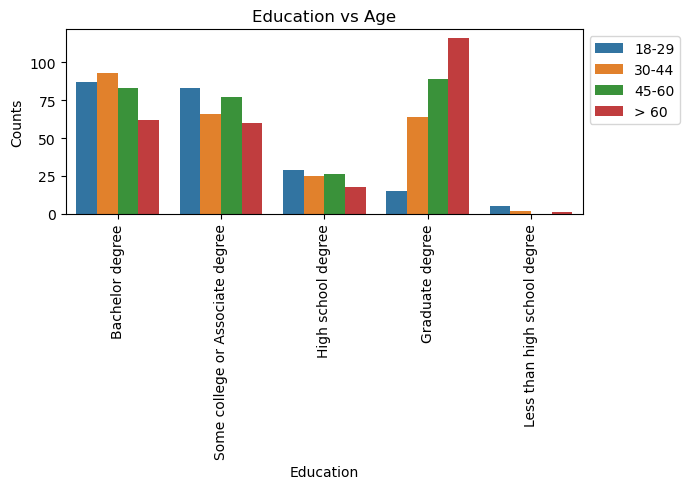

In [30]:
Bivariate_EDA(demographic_data, 'Education', 'Age')

__Insights__:

The graph depicts that the respondents are from multiple age groups across different education level. Elder people are more likely to have a Graduate degree.

#### Age vs Income


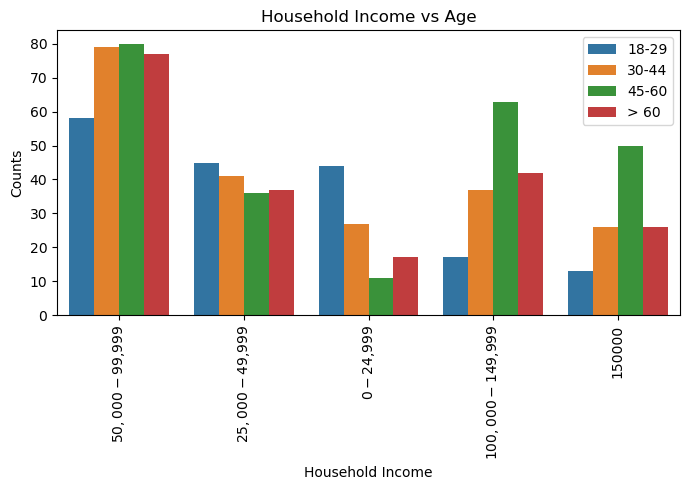

In [31]:
Bivariate_EDA(demographic_data, 'Household Income', 'Age')

__Insights__:

The graph depicts that there are more respondents between the age  18-29 with low household income. This aligns with the common understanding that people get married at their 30's which could increase the household income.
Also, Respondents between the age 45-60 falls under the highest household income bucket. This aligns with the common understanding that people in this age group usually are at higher position in companies.

Reference: https://www.statista.com/statistics/371933/median-age-of-us-americans-at-their-first-wedding/#:~:text=Median%20age%20of%20U.S.%20Americans,wedding%201998-2022%2C%20by%20sex&text=In%202022%2C%20the%20median%20age,median%20age%20was%2030.5%20years.

#### Location vs Education


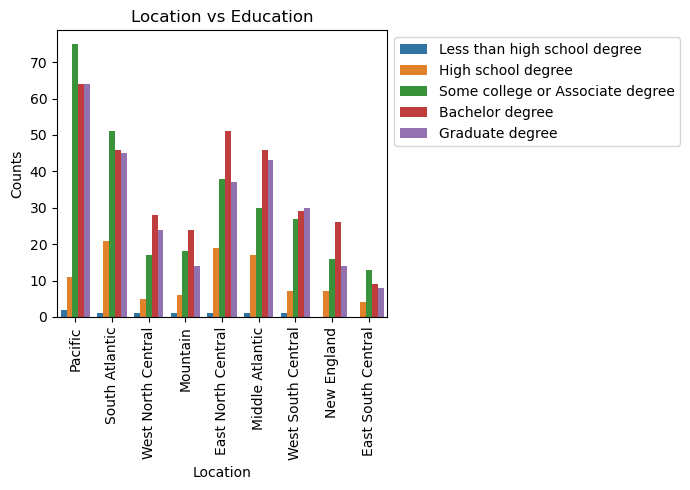

In [32]:
Bivariate_EDA(demographic_data, 'Location', 'Education')

__Insights__:

 The graph illustrates that most of the respondents across the locations has bachelor degree or Some College or Associate Degree. Except West South Central region, which has most respondents with a Graduate degree.

#### Location vs Income


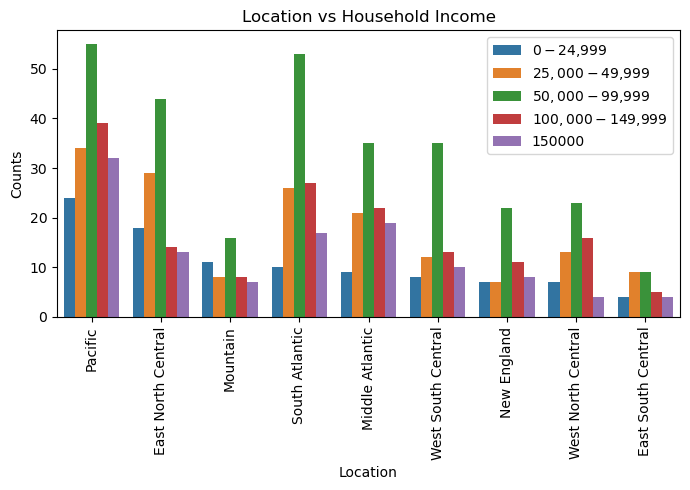

In [33]:
Bivariate_EDA(demographic_data, 'Location', 'Household Income')

__Insights__: 

The graph illustrates that most of the respondents belongs to household income group of 50,000-99,999 across all locations. This aligns with the median household income in the US.

Reference: https://www.census.gov/library/publications/2023/demo/p60-279.html#:~:text=Highlights,and%20Table%20A-1

#### Education vs Income

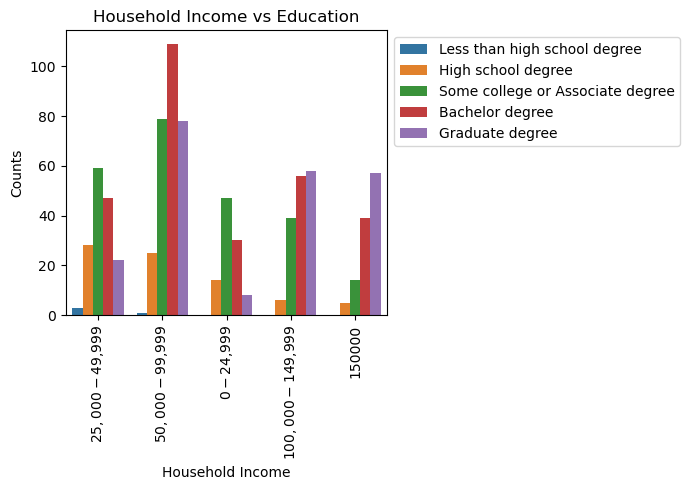

In [34]:
Bivariate_EDA(demographic_data, 'Household Income', 'Education')

__Insights__:

 The graph shows that most of the respondents with high income has a graduate degree followed by Bachelor degree. This aligns with the common thought that higher education potentially leads to higher income.

### Multivariate Analysis


#### Location vs Income vs Gender

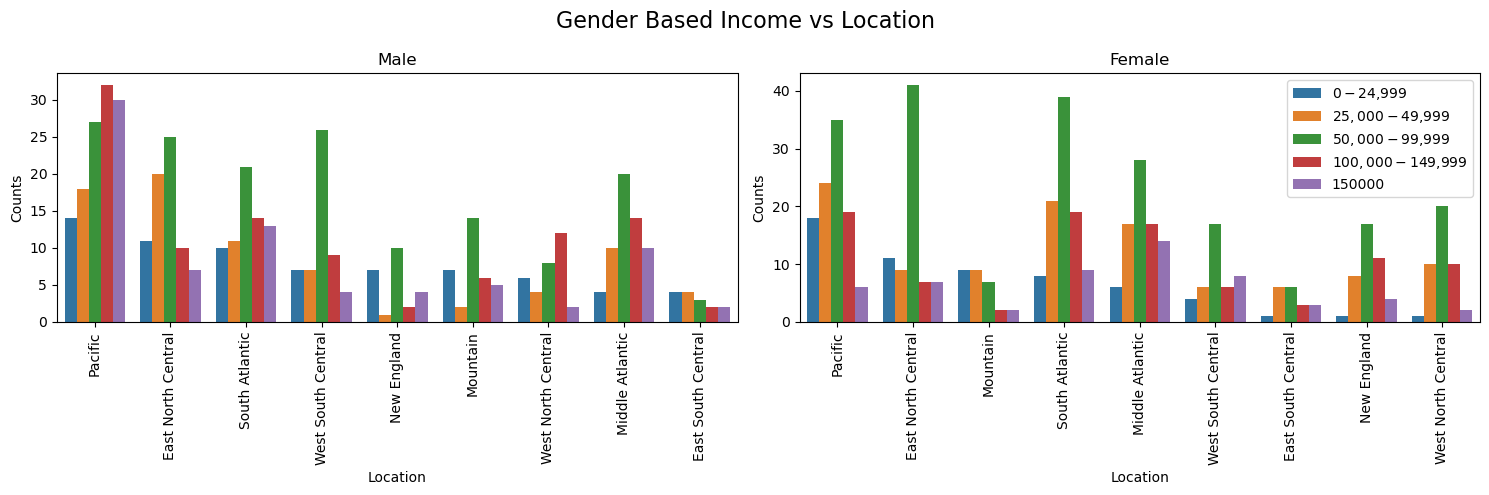

In [64]:
#frequence count for Gender, Location, Income
multivariate = demographic_data[['Gender','Location','Household Income']].value_counts().reset_index(name='counts')
multivariate['Income Sort'] = multivariate['Household Income'].apply(lambda x: int(x.split("-")[0].strip().replace("$","").replace(",","")))
multivariate =multivariate.sort_values(by = ['Income Sort', 'counts'], ascending = [True, False])

plt.figure(figsize=(15,5))
plt.suptitle('Gender Based Income vs Location', fontsize =16)

#Plot Education vs Income for male respondents
plt.subplot(1,2,1)
sns.barplot(x= 'Location', y='counts', data= multivariate[multivariate['Gender']=='Male'].iloc[:,1:], hue='Household Income', palette="tab10")
plt.legend().set_visible(False)
plt.ylabel("Counts")
plt.title('Male')
plt.tick_params(axis='x', rotation=90)

#Plot Education vs Income for female respondents
plt.subplot(1,2,2)
sns.barplot(x= 'Location', y='counts', data= multivariate[multivariate['Gender']=='Female'].iloc[:,1:], hue='Household Income', palette="tab10")
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel("Counts")
plt.title('Female')
plt.tick_params(axis='x', rotation=90)
    
# Display plot
plt.tight_layout()
plt.show()

__Insights:__

The graph depicts that respondents from most of the locations has household income in the range of 50,000 to 99,999 regardless the gender

Notably, most of the male respondents from Pacific has household income more than 150000 and the male respondents from West North Central has household income of 100,000 - 149,999.

### Data Cleaning - Demographic Data

In [36]:
#Check for null values
demographic_data.isna().sum()

Respondent_ID         0
Height              182
Gender               33
Age                  33
Household Income    214
Education            39
Location             42
Flyer                 0
dtype: int64

Drop rows which does not contain any demographic data other than Height. Because these responses does not add any demographic value

In [37]:
# Create a boolean mask for rows with NaN values in columns 3 to 7
mask = demographic_data.iloc[:, 2:7].notna().any(axis=1)

# Filter the DataFrame using the mask
demographic_data = demographic_data[mask]

demographic_data.isna().sum()

Respondent_ID         0
Height              164
Gender                0
Age                   0
Household Income    181
Education             6
Location              9
Flyer                 0
dtype: int64

The null values present in Gender and Age columns are taken care by the above step.

#### Height

In [38]:
demographic_data.Height.agg(['mean','median'])

mean      171.303867
median    170.180000
Name: Height, dtype: float64

The mean value of height and the median value of height is similar. This means that the height values is normally distributed. Hence, we can use mode value of height to impute the NULL values.

In [39]:
demographic_data.Height.fillna(demographic_data.Height.median(), inplace=True)
demographic_data.Height.agg(['mean','median'])

mean      171.120834
median    170.180000
Name: Height, dtype: float64

The resulting data is not skewed further. Hence, mode imputation is valid.

#### Education

In [40]:
null_education = demographic_data[demographic_data.Education.isnull()]
null_education

,Respondent_ID,Height,Gender,Age,Household Income,Education,Location,Flyer
192,3433254127,198.12,Female,30-44,NaN,NaN,Pacific,Y
247,3433180795,167.64,Male,30-44,"$50,000 - $99,999",NaN,New England,Y
443,3432832379,152.40,Female,30-44,NaN,NaN,East North Central,Y
448,3432826278,180.34,Male,18-29,NaN,NaN,New England,Y
476,3432748659,172.72,Male,> 60,NaN,NaN,Pacific,Y
486,3432725057,172.72,Male,30-44,"$50,000 - $99,999",NaN,East North Central,Y


We used the mode education value of other respondents having similar attributes to fill the missing education values. We used Gender and Age here.

In [41]:
# replace the missing education values using the mode education value found for respondents having the same gender and age values

demographic_data['Education'] = demographic_data.groupby(['Gender', 'Age']).Education.transform(lambda x: x.fillna(x.mode().iloc[0]))

demographic_data.isna().sum()

Respondent_ID         0
Height                0
Gender                0
Age                   0
Household Income    181
Education             0
Location              9
Flyer                 0
dtype: int64

#### Location

In [42]:
null_location = demographic_data[demographic_data.Location.isnull()]
null_location

,Respondent_ID,Height,Gender,Age,Household Income,Education,Location,Flyer
105,3433363377,170.18,Male,18-29,"$100,000 - $149,999",Graduate degree,NaN,N
204,3433238383,180.34,Male,> 60,150000,Graduate degree,NaN,Y
212,3433225120,160.02,Female,30-44,NaN,Graduate degree,NaN,Y
234,3433197818,170.18,Female,> 60,"$100,000 - $149,999",High school degree,NaN,N
298,3433104895,165.10,Female,45-60,"$100,000 - $149,999",Graduate degree,NaN,Y
395,3432938209,170.18,Female,45-60,"$100,000 - $149,999",Bachelor degree,NaN,Y
414,3432898980,170.18,Male,> 60,"$50,000 - $99,999",Graduate degree,NaN,N
509,3432686853,182.88,Female,45-60,"$50,000 - $99,999",Bachelor degree,NaN,Y
808,3432210766,157.48,Female,45-60,"$0 - $24,999",Some college or Associate degree,NaN,Y


We used the mode location value of other respondents having similar attributes to fill the missing location values. We used Gender, Age and Education here.

In [43]:
# replace the missing location values using the mode education value found for respondents having the same gender, age and education values

demographic_data['Location'] = demographic_data.groupby(['Gender', 'Age', 'Education']).Location.transform(lambda x: x.fillna(x.mode().iloc[0]))

demographic_data.isna().sum()

Respondent_ID         0
Height                0
Gender                0
Age                   0
Household Income    181
Education             0
Location              0
Flyer                 0
dtype: int64

#### Household Income

We used the mode Household Income value of other respondents having similar attributes to fill the missing Household Income values. We used Gender, Age, Education and Location here.

In [65]:
# Define a function to fill NaN values with mode if at least one non-NaN value is present
def fillna_mode(group):
    '''
    Fill NaN values with mode if at least one non-NaN value is present
    '''
    if group.notna().any() and not group.mode().empty:
        return group.fillna(group.mode().iloc[0])
    else:
        return group


demographic_data['Household Income'] = demographic_data.groupby(['Gender', 'Age', 'Education', 'Location'])['Household Income'].transform(fillna_mode)

demographic_data.isna().sum()

Respondent_ID       0
Height              0
Gender              0
Age                 0
Household Income    0
Education           0
Location            0
Flyer               0
dtype: int64

There are few nulls which are not treated by the above step. Because there is no other respondents with similar attributes. So We used the overall mode Household Income value fill the remaining missing Household Income values. 

In [45]:
demographic_data['Household Income'] = demographic_data['Household Income'].fillna(demographic_data['Household Income'].mode()[0])

demographic_data.isna().sum()

Respondent_ID       0
Height              0
Gender              0
Age                 0
Household Income    0
Education           0
Location            0
Flyer               0
dtype: int64

### Data Cleaning - Non Demographic Data

In [46]:
non_demographic_data.isna().sum()

Respondent_ID       0
Question            0
Response         3560
dtype: int64

Drop rows which does not contain any data for Response. Because these responses does not add any non-demographic value

In [47]:
#Drop rows with null values
non_demographic_data.dropna(inplace = True)
non_demographic_data.isna().sum()

Respondent_ID    0
Question         0
Response         0
dtype: int64

## 4) Demographic Analysis: Flyers vs. Non-Flyers

__8. Analyze and summarize the demographic characteristics of individuals who NEVER fly vs. those of individuals who at least sometimes fly__

In [48]:
def Flyer_vs_Nonflyer(df, col1, col2 = 'Flyer'):
    
    '''Performs Analysis and summarize the demographic characteristics of flyers vs Non Flyers
    Args:
    df: A Dataframe to perform  analysis
    col1: Column in the df to perform analysis
    col2: Flyer Column from the df
    Returns:
    None
    '''    

    flyer_df = df.groupby([col1, col2]).size().to_frame(name='Count').sort_values(by='Count', ascending =False)
    display(flyer_df)
    
    #Unstack the dataframe
    flyer_df = flyer_df.unstack()
    flyer_df['Flyer %'] = 100 * flyer_df[('Count', 'Y')] / (flyer_df[('Count', 'Y')] + flyer_df[('Count', 'N')])
    flyer_df = flyer_df.sort_values(by = 'Flyer %', ascending = False)
    display(flyer_df.drop('Count', axis =1))

    # Create dataframe with value counts of col1 and col2
    bivariate = df[[col1,col2]].value_counts().reset_index(name='counts')
        
    plt.figure(figsize=(5,5))
    sns.barplot(x= col1, y='counts', data= bivariate, hue=col2, dodge = False)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.ylabel("Counts")
    
    plt.title(col1 + ' vs ' + col2)
    plt.tick_params(axis='x', rotation=90)
    
    # Display plot
    plt.tight_layout()
    plt.show()   
    
    return None   

### Height

Height        
             mean  median
Flyer                    
N      170.180000  170.18
Y      171.303867  170.18

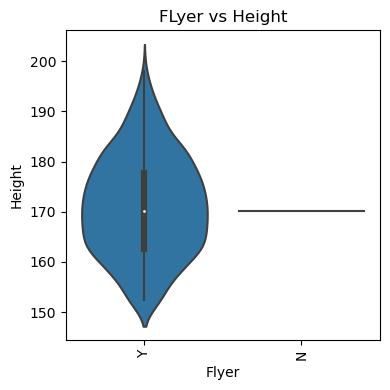

In [49]:
display(demographic_data.groupby('Flyer')[['Height']].agg(['mean','median']))

#Plot violin plot
plt.figure(figsize=(4,4))
sns.violinplot(x='Flyer', y='Height', data=demographic_data)
plt.title('FLyer vs Height')
plt.tick_params(axis='x', rotation=90)
    
# Display plot
plt.tight_layout()
plt.show()   

__Insights__ :

Average Height of Flyers is 171.30 cm. Median Height of Flyers is 170.18 cm.\
Non-Flyers has not responded to the 'How tall are you' question. So the data was initially null. After the data cleaning step, the data is filled with median height value for analysis purposes.


### Gender

,,Count
Gender,Flyer,
Female,Y,442
Male,Y,401
Female,N,86
Male,N,78


,Flyer %
Flyer,
Gender,
Male,83.716075
Female,83.712121


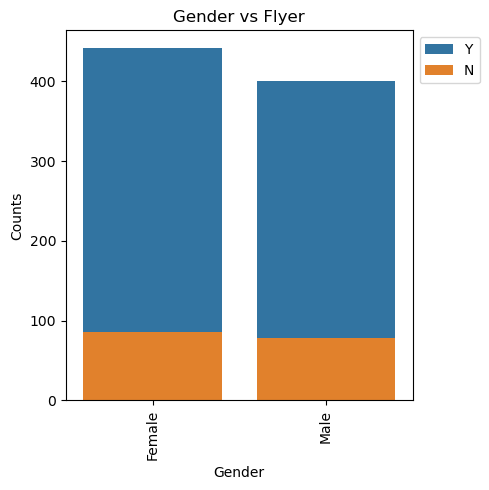

In [50]:
Flyer_vs_Nonflyer(demographic_data, 'Gender')

__Insights__ :

According to the responses gathered, the number of female flyers is higher than the number of male flyers. Both genders has similar percentage of flyers (male is slightly higher by 0.004%)

### Location

,,Count
Location,Flyer,
Pacific,Y,187
South Atlantic,Y,139
East North Central,Y,122
Middle Atlantic,Y,114
West South Central,Y,81
West North Central,Y,66
New England,Y,55
Mountain,Y,54
Pacific,N,36


,Flyer %
Flyer,
Location,
West North Central,88.000000
West South Central,86.170213
Mountain,85.714286
New England,84.615385
South Atlantic,84.242424
Pacific,83.856502
East North Central,82.432432
Middle Atlantic,81.428571


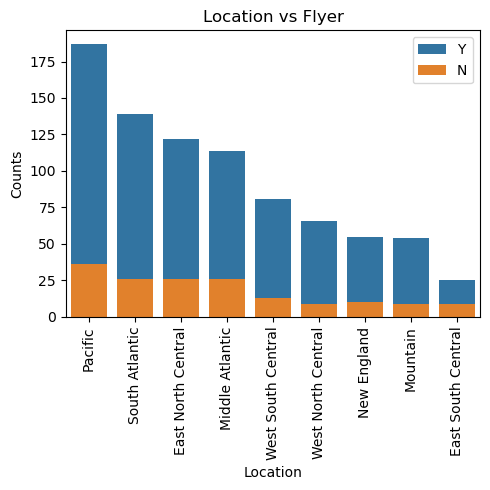

In [51]:
Flyer_vs_Nonflyer(demographic_data, 'Location')

__Insights__ : 

According to the responses gathered, Pacific has the highest number of flyers (187). West North Central has the highest percentage of flyers(88%).

### Education

,,Count
Education,Flyer,
Bachelor degree,Y,283
Graduate degree,Y,266
Some college or Associate degree,Y,227
High school degree,Y,61
Some college or Associate degree,N,60
Bachelor degree,N,46
High school degree,N,37
Graduate degree,N,19
Less than high school degree,Y,6


,Flyer %
Flyer,
Education,
Graduate degree,93.333333
Bachelor degree,86.018237
Some college or Associate degree,79.094077
Less than high school degree,75.000000
High school degree,62.244898


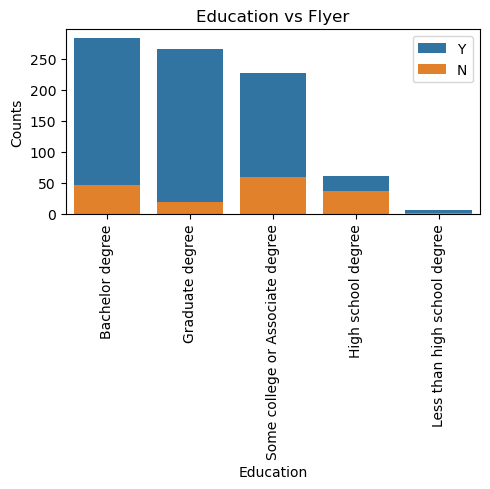

In [52]:
Flyer_vs_Nonflyer(demographic_data, 'Education')

__Insights__ : 


According to the responses gathered, the highest number of flyers has a Bachelor degree (283). Respondents with Graduate degree are mostly flyers (93.3%).

### Household Income

,,Count
Household Income,Flyer,
"$50,000 - $99,999",Y,319
"$100,000 - $149,999",Y,176
"$25,000 - $49,999",Y,142
150000,Y,121
"$0 - $24,999",Y,85
"$25,000 - $49,999",N,45
"$50,000 - $99,999",N,45
"$0 - $24,999",N,44
"$100,000 - $149,999",N,19


,Flyer %
Flyer,
Household Income,
150000,91.666667
"$100,000 - $149,999",90.256410
"$50,000 - $99,999",87.637363
"$25,000 - $49,999",75.935829
"$0 - $24,999",65.891473


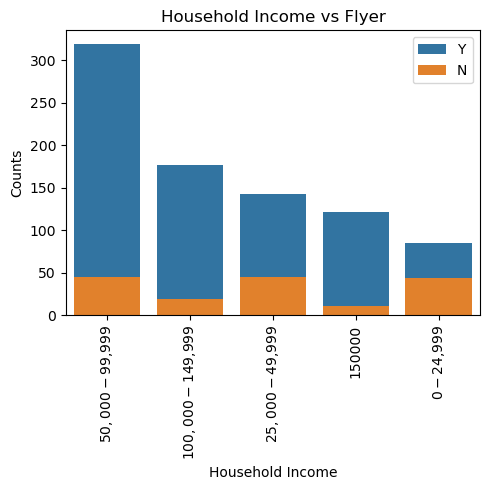

In [53]:
Flyer_vs_Nonflyer(demographic_data, 'Household Income')

__Insights__ : 

According to the responses gathered, the highest number of flyers has household income of 50,000-99,999 (319). Respondents with household income of $150000 and above are mostly flyers (91.66%), closely followed by respondents with household income greater than 100,000 - 149,999 (90.25%)

## 5) Flyers: Demographic “Drill-down”

In [54]:
merged_data = pd.merge(demographic_data[demographic_data['Flyer']=='Y'], non_demographic_data , on='Respondent_ID')
merged_data.head()

,Respondent_ID,Height,Gender,Age,Household Income,Education,Location,Flyer,Question,Response
0,3434278696,190.5,Male,30-44,150000,Graduate degree,Pacific,Y,Travel_Frequency,Once a year or less
1,3434278696,190.5,Male,30-44,150000,Graduate degree,Pacific,Y,Recline_Preference,About half the time
2,3434278696,190.5,Male,30-44,150000,Graduate degree,Pacific,Y,Children_Under18,Yes
3,3434278696,190.5,Male,30-44,150000,Graduate degree,Pacific,Y,Armrest_Preference_RowOfThree,The arm rests should be shared
4,3434278696,190.5,Male,30-44,150000,Graduate degree,Pacific,Y,Armrest_Preference_RowOfTwo,The arm rests should be shared


In [55]:
def drilldown(merged_data, question, response, group, title):
    '''Performs demographic analysis on questions and likely responses 
    Args:
    merged_data: A Dataframe to perform  analysis
    question: question to filter the data
    response: response to analyse
    group: group to analyse
    title: title for the graph
    Returns:
    None
    '''    
    #filter data based on the question
    dd_data = merged_data[merged_data['Question']==question] [[group, 'Response']] 
    #Map the likely response as Y and others as N
    dd_data['Response'] = dd_data['Response'].map(lambda x: 'Y' if x==response  else 'N')
    
    #Create a cross tab
    cross_tab = pd.crosstab(index=dd_data[group], columns=dd_data['Response'])
    cross_tab = cross_tab[['Y','N']]
    cross_tab['Likeliness %'] = 100 * cross_tab['Y'] / (cross_tab['Y'] + cross_tab['N'])    
    display(cross_tab)   
    
    #Create a normalized cross tab to create a 100 percent stacked bar chart
    cross_tab_prop = pd.crosstab(index=dd_data[group], columns=dd_data['Response'], normalize="index")   
    cross_tab_prop.plot(kind='bar', stacked=True, colormap='vlag', figsize=(5,5))
    
    plt.title(title)
    plt.ylabel("% of Responses")
    plt.tick_params(axis='x', rotation=90)
    plt.legend(bbox_to_anchor=(1, 1))
        
    # Display plot
    plt.tight_layout()
    plt.show()  

__1. Which age grouping is most likely to responded “About half the time” to the question “Do you ever recline your seat when you fly?”__

Response,Y,N,Likeliness %
Age,,,
18-29,21,151,12.209302
30-44,33,189,14.864865
45-60,34,200,14.529915
> 60,28,187,13.023256


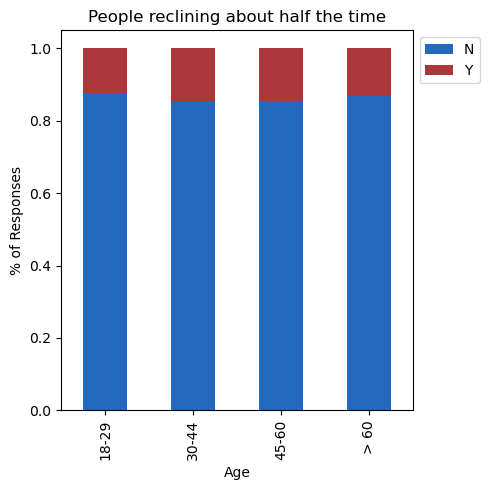

In [56]:
drilldown(merged_data, 'Recline_Preference', 'About half the time', 'Age', 'People reclining about half the time')

__Insights__ : 

The age group most likely to respond "About half the time" to the question "Do you ever recline your seat when you fly?" is __30 to 44__.\
People from age group __45-60__ has the most number of favorable response for the given question.

__2. Are male or female flyers most likely to have responded “Yes” to the question “Do you have any children under 18?”__

Response,Y,N,Likeliness %
Gender,,,
Female,94,346,21.363636
Male,93,306,23.308271


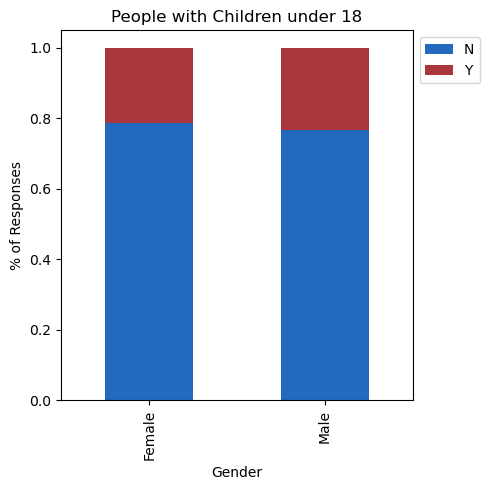

In [57]:
drilldown(merged_data, 'Children_Under18', 'Yes', 'Gender', 'People with Children under 18')

__Insights__ : 

__Male__ respondents are more likely to respond "Yes" to the question "Do you have any children under 18?". But the difference is very low.\
Whereas __Female__ respondents has the most number of favorable response for the given question

__3. Which income group is least likely to have responded “The person in the window seat should have exclusive control” to the question “Who should have control over the window shade?”__

Response,Y,N,Likeliness %
Household Income,,,
"$0 - $24,999",39,46,45.882353
"$100,000 - $149,999",67,109,38.068182
"$25,000 - $49,999",62,80,43.661972
"$50,000 - $99,999",133,186,41.692790
150000,52,69,42.975207


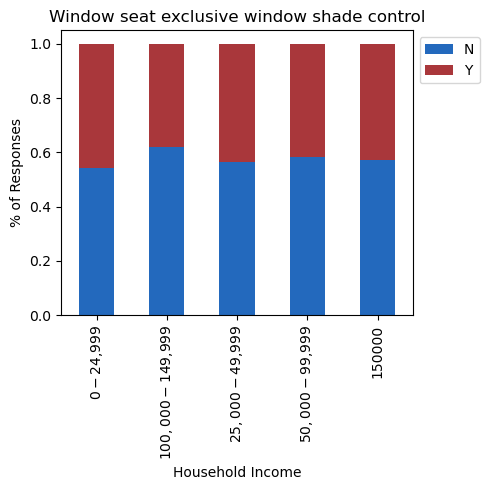

In [58]:
drilldown(merged_data, 'Window_Shade_Control', 'The person in the window seat should have exclusive control', 'Household Income', 'Window seat exclusive window shade control')

__Insights__ : 

The Income group least likely to respond “The person in the window seat should have exclusive control” to the question “Who should have control over the window shade?” is __100,000-149,000__ \
Whereas the income group __0 - 24,999__  has the least number of favorable response for the given question.

__4. How have the various ‘Location” groupings responded to the question “Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?”__

Response,Yes,No,Likeliness %
Location,,,
East North Central,85,37,69.672131
East South Central,20,5,80.000000
Middle Atlantic,66,48,57.894737
Mountain,33,21,61.111111
New England,36,19,65.454545
Pacific,107,80,57.219251
South Atlantic,95,44,68.345324
West North Central,41,25,62.121212
West South Central,55,26,67.901235


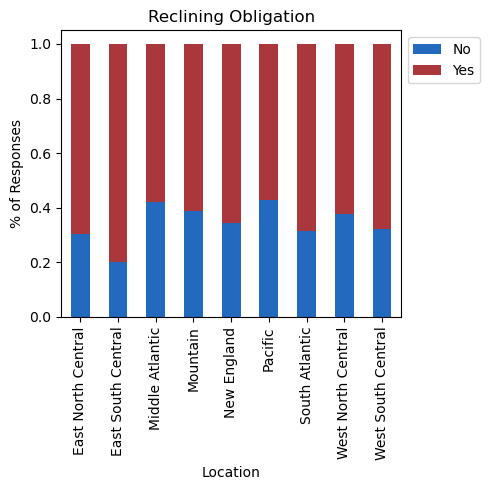

In [59]:
dd_data = merged_data[merged_data['Question']=='Reclining_Obligation'] [['Location', 'Response']] 

dd_data['Response'] = dd_data['Response'].map(lambda x: str(x).split(',')[0])

#Create a cross tab
cross_tab = pd.crosstab(index=dd_data['Location'], columns=dd_data['Response'])
cross_tab = cross_tab[['Yes','No']]
cross_tab['Likeliness %'] = 100 * cross_tab['Yes'] / (cross_tab['Yes'] + cross_tab['No'])    
display(cross_tab)   

#Create a normalized cross tab to create a 100 percent stacked bar chart
cross_tab_prop = pd.crosstab(index=dd_data['Location'], columns=dd_data['Response'], normalize="index")    
cross_tab_prop.plot(kind='bar', stacked=True, colormap='vlag', figsize=(5,5))


plt.title('Reclining Obligation')
plt.ylabel("% of Responses")
plt.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
        
# Display plot
plt.tight_layout()
plt.show()  

__Insights__ : 

Respondents from __East South Central__ are __most likely__ to answer Yes, they have obligation.\
Respondents from __Pacific__ are __least likely__ to answer Yes, they have obligation.

In contrast, __Pacific__ has the __highest__ number of responses with Yes, they have obligation.\
And __East South Central__ has __lowest__ number of responses with Yes, they have obligation

__5. Which gender is most likely to have responded “No, not at all rude” to the question “Is it rude to wake a passenger up if you are trying to go to the bathroom?”__

Response,Y,N,Likeliness %
Gender,,,
Female,261,181,59.049774
Male,272,129,67.830424


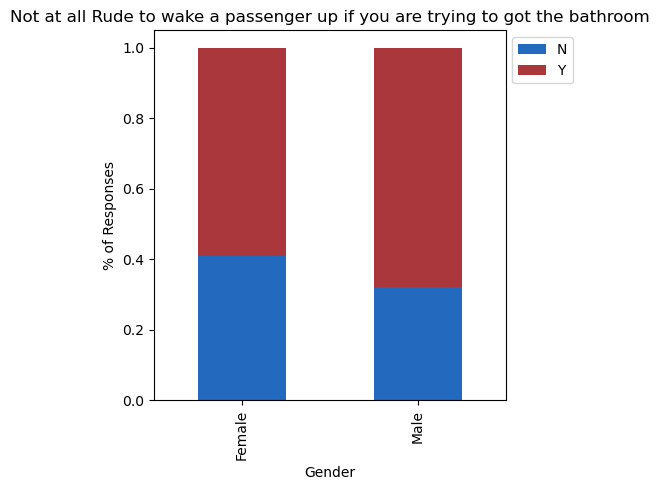

In [60]:
drilldown(merged_data, 'Wake_Up_Rudeness_Bathroom', 'No, not at all rude', 'Gender', 'Not at all Rude to wake a passenger up if you are trying to got the bathroom')

__Insights__ : 

__Male__ respondents are more likely to respond “No, not at all rude” to to the question “Is it rude to wake a passenger up if you are trying to go to the bathroom?”\
Also __Male__ respondents has the most number of favorable response for the given question.

__6. What is the average height (in centimeters) of the male survey respondents? What is the average height (in centimeters) of the female survey respondents?__

,Gender,Avg height
1,Male,178.502317
0,Female,164.772944


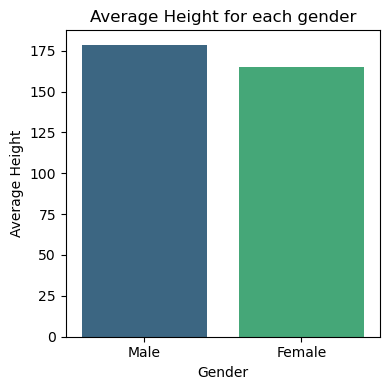

In [61]:
dd_data = merged_data.groupby('Gender').agg({'Height': 'mean'}).reset_index().rename(columns={'Height': 'Avg height'}).sort_values(by='Avg height', ascending = False)
display(dd_data)

# create a bar plot of the value counts   
plt.figure(figsize=(4,4))
sns.barplot(x = dd_data['Gender'], y = dd_data['Avg height'], palette="viridis")
plt.title("Average Height for each gender")
plt.xlabel("Gender")
plt.ylabel("Average Height")

# Display plot
plt.tight_layout()
plt.show()   

__Insights__ : 

Average height of the __male__ survey respondents: 178.5\
Average height of the __female__ survey respondents: 164.7

__7. Provide a general demographic profile of individuals who have responded “No, not at all rude” to the question “In general, is it rude to knowingly bring unruly children on a plane?”__

In [62]:
dd_data = merged_data[(merged_data['Question']=='Unruly_Children_Rudeness') &
                      (merged_data['Response']=='No, not at all rude')][merged_data.columns[1:7]]
       
display(dd_data.Height.agg(['mean', 'median']))

#Iterate through all demographic columns
for col in dd_data.columns[1:]:
    
    display(dd_data.groupby(col).size().to_frame(name='Count').sort_values(by='Count', ascending =False))

mean      169.54068
median    167.64000
Name: Height, dtype: float64

,Count
Gender,
Female,91
Male,56


,Count
Age,
30-44,56
45-60,36
18-29,30
> 60,25


,Count
Household Income,
"$50,000 - $99,999",60
"$100,000 - $149,999",27
"$25,000 - $49,999",21
150000,21
"$0 - $24,999",18


,Count
Education,
Graduate degree,57
Bachelor degree,48
Some college or Associate degree,35
High school degree,6
Less than high school degree,1


,Count
Location,
Pacific,28
South Atlantic,24
East North Central,21
Middle Atlantic,21
West North Central,19
New England,10
West South Central,10
Mountain,9
East South Central,5


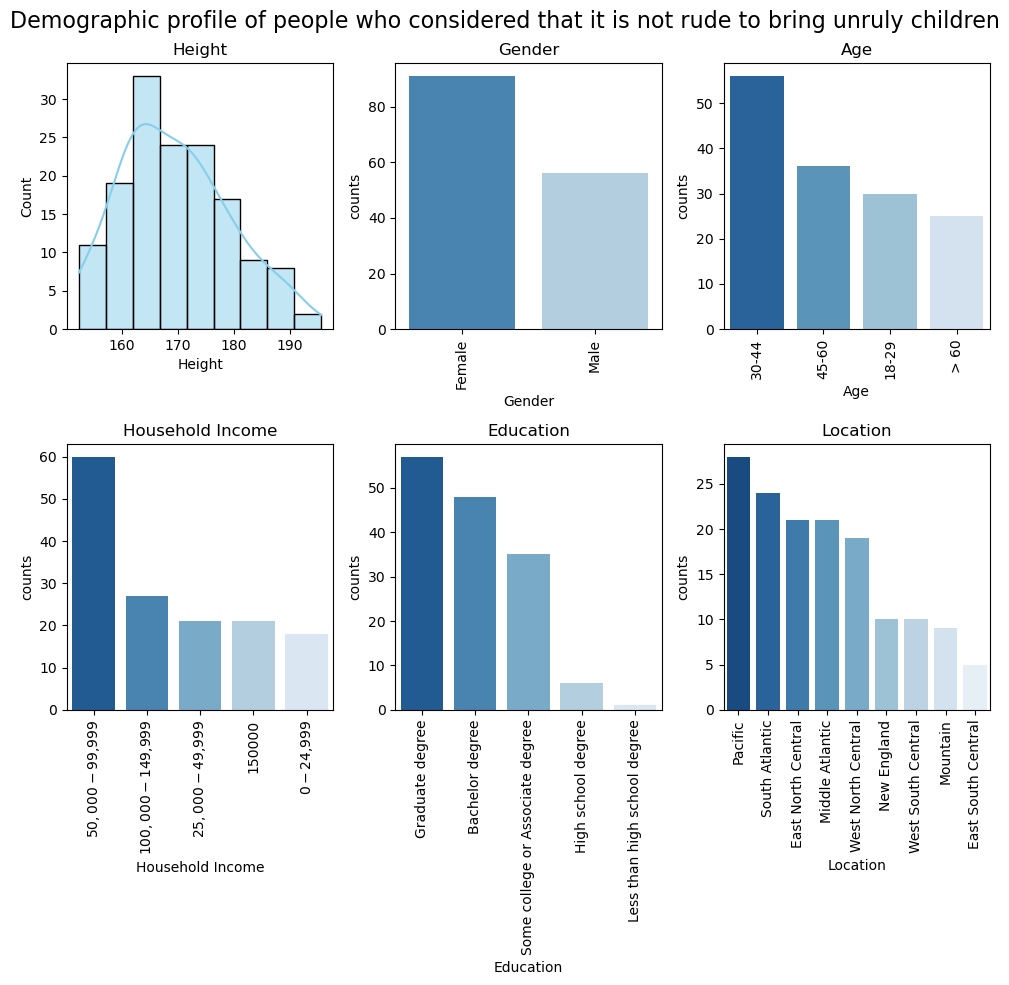

In [63]:
# Define 1x2 plot and add title
plt.figure(figsize=(10,10))
plt.suptitle("Demographic profile of people who considered that it is not rude to bring unruly children", fontsize=16)
pos=1

#Histogram plot for numeric data
plt.subplot(2,3,1)
sns.histplot(data=dd_data, x='Height', kde=True, color='skyblue')
plt.title('Height')
 
#Iterate through all demographic columns   
for col in dd_data.columns[1:]:
    
    #Bar plot for numeric data       
    dd_data_count = dd_data[[col]].value_counts().reset_index(name='counts')
    pos+=1
    plt.subplot(2,3,pos)
    sns.barplot(x= col, y='counts', data= dd_data_count, palette="Blues_r")
    plt.title(col)
    plt.tick_params(axis='x', rotation=90)

    
# Display plot
plt.tight_layout()
plt.show()

__Insights:__

- __Height__- Median Height is 167.6 cm
- __Gender__ - More females have responded 'not rude' compared to males.
- __Age__ - Most of the 'not rude' responses are from Age group 30 - 44, least being  >60
- __Household Income__ - Most of the 'not rude' responses are from Income group 50,000 - 99,999, least being '0-24,999'
- __Education__ - Most of the 'not rude' responses are from respondents with Graduate degree level Education, least being 'Less than high school degree'
- __Location__  Most of the 'not rude' responses are from Pacific region, least being 'East South Central'.


## 6) Findings / Summary

__Key Insights:__

In the bustling world of air travel, passengers from all walks of life converge, each with their own unique set of preferences and expectations. Understanding these diverse perspectives is crucial for airlines striving to create a harmonious and comfortable flying experience for all.

- Among the passengers surveyed, those in the 30-44 age group emerged as the most likely to indulge in the act of reclining their seats, seeking that extra inch of legroom for added comfort.
- Interestingly, the gender divide showed no significant difference when it came to having children under 18, suggesting that parenthood transcends gender norms.
- When it comes to window shade control, income played a decisive role. Respondents from the $100,000-$149,000 bracket were least likely to believe that the window seat occupant held exclusive control over the shade, advocating for a more inclusive approach.
- Geographical trends also emerged, with respondents from East South Central exhibiting a stronger sense of reclining obligation, while those from the Pacific region held a more relaxed view.
- In the realm of bathroom etiquette, male respondents proved more tolerant of being woken up for a fellow passenger's bathroom needs. This difference could stem from varying levels of empathy or perhaps a greater understanding of the urgency that can accompany such requests.
- Male respondents, on average, stood taller than the female respondents.
- When faced with the question of unruly children on flights, a specific demographic profile emerged as the most accepting.
    - Median height is 167.6 cm
    - More females than males
    - Age group 30-44
    - Household income 50,000-99,999
    - Graduate degree level education
    - Pacific region

__Recommendations:__

- Educate passengers about the airline's policies on reclining seats, children, and window shades.
- Train flight attendants to handle conflicts between passengers.
- Consider creating a designated area for children on the plane.

These findings and recommendations can be used by major airlines to enhance the flying experience, manage expectations, and potentially improve policies based on passenger preferences. By understanding passengers' perspectives on in-flight behaviors, airlines can create a more harmonious and comfortable environment for all passengers.